In [1]:
import pandas as pd
import requests

In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup

In [4]:
def fetch_top_10_cryptos():
    url = "https://coinmarketcap.com/coins/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    table = soup.find('table')
    cryptos = []

    if table:
        for row in table.find_all('tr')[1:11]: 
            columns = row.find_all('td')
            name = columns[2].find('p').text.strip()
            price = columns[3].text.strip()
                
            cryptos.append({
                'Name': name,
                'Price': price
            })
    return cryptos

def main():
    top_10_cryptos = fetch_top_10_cryptos()
    df = pd.DataFrame(top_10_cryptos)
    print(df)

main()

       Name       Price
0   Bitcoin  $82,569.74
1  Ethereum   $1,657.39
2    Tether     $0.9998
3       XRP       $2.04
4       BNB     $583.28
5    Solana     $120.47
6      USDC       $1.00
7  Dogecoin     $0.1613
8   Cardano     $0.6375
9      TRON     $0.2355


In [5]:
pip install -U pycoingecko

Note: you may need to restart the kernel to use updated packages.


In [30]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
from datetime import datetime
import requests
import matplotlib.pyplot as plt

from pycoingecko import CoinGeckoAPI
import pandas as pd
from datetime import datetime

cg = CoinGeckoAPI()

def get_top_10_cryptos_2023():
    date = "01-01-2023"
    historical_data = cg.get_coins_markets(
        vs_currency='usd',
        date=date,
        per_page=10,  
        order='market_cap_desc'
    )
    
    cryptos = []
    for coin in historical_data:
        cryptos.append({
            'Rank': coin['market_cap_rank'],
            'Name': coin['name'],
            'Symbol': coin['symbol'].upper(),
            'Price (USD)': coin['current_price'],
            'Market Cap (USD)': coin['market_cap']
        })
    
    return cryptos

def get_historical_prices(coin_id, days=365):
    prices = cg.get_coin_market_chart_by_id(
        id=coin_id,
        vs_currency='usd',
        days=days
    )
    return prices['prices']

def main():
    top_10 = get_top_10_cryptos_2023()
    df = pd.DataFrame(top_10)
    print("Top 10 Cryptocurrencies on Jan 1, 2023:")
    print(df)
    

    df.to_csv('top_10_cryptos_jan2023.csv', index=False)
    print("\nData saved to 'top_10_cryptos_jan2023.csv'")
    
    btc_prices = get_historical_prices('bitcoin')
    btc_df = pd.DataFrame(btc_prices, columns=['timestamp', 'price'])
    btc_df['date'] = pd.to_datetime(btc_df['timestamp'], unit='ms')
    btc_df.to_csv('bitcoin_prices_2023.csv', index=False)
    print("\nBitcoin 2023 price history saved to 'bitcoin_prices_2023.csv'")

if __name__ == "__main__":
    main()

Top 10 Cryptocurrencies on Jan 1, 2023:
   Rank      Name Symbol   Price (USD)  Market Cap (USD)
0     1   Bitcoin    BTC  82279.000000     1633322152025
1     2  Ethereum    ETH   1648.150000      198990924565
2     3    Tether   USDT      0.999785      143983120607
3     4       XRP    XRP      2.040000      118695973680
4     5       BNB    BNB    581.170000       84824864241
5     6    Solana    SOL    118.630000       61359607872
6     7      USDC   USDC      0.999884       59921428099
7     8  Dogecoin   DOGE      0.160089       23811845904
8     9   Cardano    ADA      0.635772       22966791148
9    10      TRON    TRX      0.235794       22394684885

Data saved to 'top_10_cryptos_jan2023.csv'

Bitcoin 2023 price history saved to 'bitcoin_prices_2023.csv'


In [12]:
def main():
    eth_prices = get_historical_prices('ethereum')
    eth_df = pd.DataFrame(eth_prices, columns=['timestamp', 'price'])
    eth_df['date'] = pd.to_datetime(eth_df['timestamp'], unit='ms')
    eth_df.to_csv('ethereum_prices_2023.csv', index=False)
    print("\nEthereum 2023 price history saved to 'ethereum_prices_2023.csv'")
if __name__ == "__main__":
    main()


Ethereum 2023 price history saved to 'ethereum_prices_2023.csv'


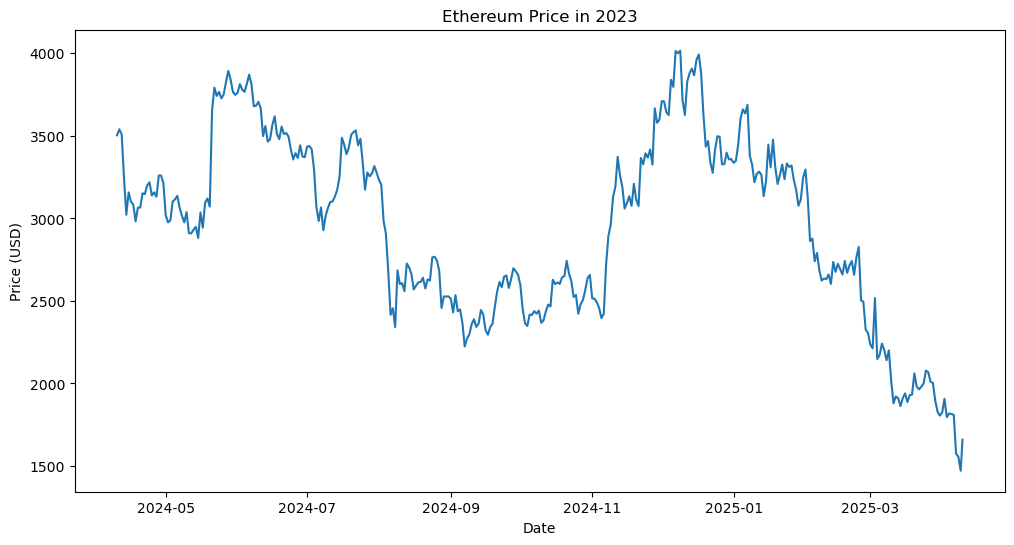

In [13]:
import matplotlib.pyplot as plt
eth_2023 = pd.read_csv('ethereum_prices_2023.csv')
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(eth_2023['timestamp'], unit='ms'), eth_2023['price'])
plt.title('Ethereum Price in 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [14]:
def main():
    btc_prices = get_historical_prices('bitcoin')
    btc_df = pd.DataFrame(btc_prices, columns=['timestamp', 'price'])
    btc_df['date'] = pd.to_datetime(btc_df['timestamp'], unit='ms')
    btc_df.to_csv('bitcoin_prices_2023.csv', index=False)

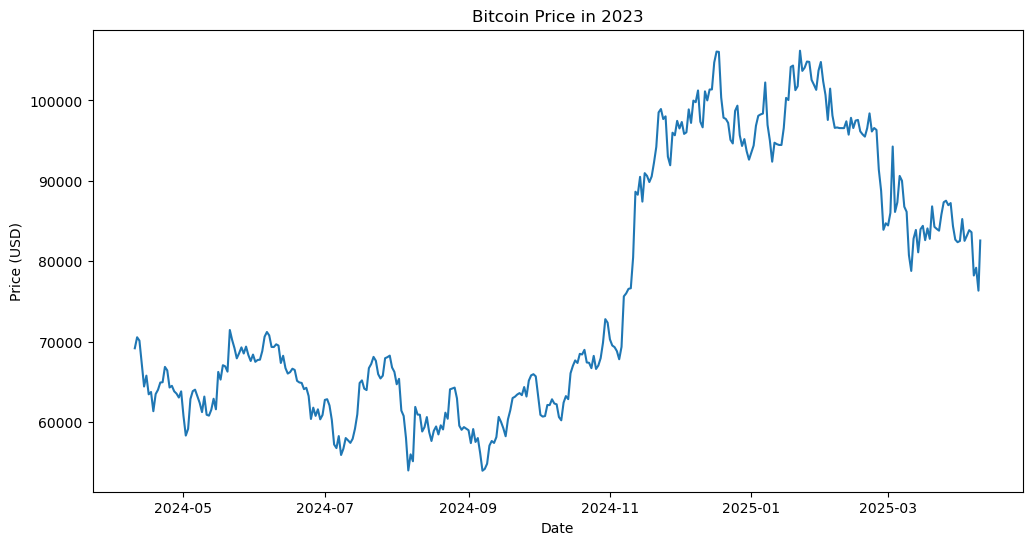

In [15]:
btc_2023 = pd.read_csv('bitcoin_prices_2023.csv')
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(btc_2023['timestamp'], unit='ms'), btc_2023['price'])
plt.title('Bitcoin Price in 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [16]:
def get_top_10_cryptos_2024():
    date = "01-01-2023"
    historical_data = cg.get_coins_markets(
        vs_currency='usd',
        date=date,
        per_page=10,  
        order='market_cap_desc'
    )
    
    cryptos = []
    for coin in historical_data:
        cryptos.append({
            'Rank': coin['market_cap_rank'],
            'Name': coin['name'],
            'Symbol': coin['symbol'].upper(),
            'Price (USD)': coin['current_price'],
            'Market Cap (USD)': coin['market_cap']
        })
    
    return cryptos

def get_historical_prices(coin_id, days=365):
    prices = cg.get_coin_market_chart_by_id(
        id=coin_id,
        vs_currency='usd',
        days=days
    )
    return prices['prices']

def main():
    top_10 = get_top_10_cryptos_2024()
    df = pd.DataFrame(top_10)
    print("Top 10 Cryptocurrencies on Jan 1, 2024:")
    print(df)
    

    df.to_csv('top_10_cryptos_jan2024.csv', index=False)

if __name__ == "__main__":
    main()

Top 10 Cryptocurrencies on Jan 1, 2024:
   Rank      Name Symbol   Price (USD)  Market Cap (USD)
0     1   Bitcoin    BTC  82486.000000     1638982456738
1     2  Ethereum    ETH   1658.650000      200300576744
2     3    Tether   USDT      0.999787      143983802696
3     4       XRP    XRP      2.040000      119201079734
4     5       BNB    BNB    582.280000       84964808009
5     6    Solana    SOL    119.620000       61593293188
6     7      USDC   USDC      0.999880       59921323946
7     8  Dogecoin   DOGE      0.161570       24060034933
8     9   Cardano    ADA      0.639094       23011118270
9    10      TRON    TRX      0.235786       22396319683


In [31]:

cg = CoinGeckoAPI()

def get_price_data(coin_id, date):
    date_obj = datetime.strptime(date, "%d-%m-%Y")
    timestamp = int(date_obj.timestamp())
    
    data = cg.get_coin_history_by_id(id=coin_id, date=date, localization='false')
    return data['market_data']['current_price']['usd']

def predict_2025_prices():
    top_2023 = pd.read_csv('top_10_cryptos_jan2023.csv')
    top_2024 = pd.read_csv('top_10_cryptos_jan2024.csv')
    
    crypto_data = {}
    
    for _, row_2023 in top_2023.iterrows():
        symbol = row_2023['Symbol']
        price_2023 = row_2023['Price (USD)']
        
        row_2024 = top_2024[top_2024['Symbol'] == symbol]
        if not row_2024.empty:
            price_2024 = row_2024.iloc[0]['Price (USD)']
            
            growth_rate = (price_2024 - price_2023) / price_2023
            
            price_2025 = price_2024 * (1 + growth_rate)
            
            crypto_data[symbol] = {
                'Name': row_2023['Name'],
                '2023 Price': price_2023,
                '2024 Price': price_2024,
                'Growth Rate': f"{growth_rate:.2%}",
                '2025 Prediction': price_2025
            }
    
    results_df = pd.DataFrame.from_dict(crypto_data, orient='index')
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'index': 'Symbol'}, inplace=True)
    results_df.to_csv('crypto_predictions_2025.csv', index=False)
    
    print("2025 Price Predictions:")
    print(results_df[['Symbol', 'Name', '2023 Price', '2024 Price', 'Growth Rate', '2025 Prediction']])
    
    return results_df

if __name__ == "__main__":
    predict_2025_prices()

2025 Price Predictions:
  Symbol      Name    2023 Price    2024 Price Growth Rate  2025 Prediction
0    BTC   Bitcoin  82279.000000  82486.000000       0.25%     82693.520777
1    ETH  Ethereum   1648.150000   1658.650000       0.64%      1669.216893
2   USDT    Tether      0.999785      0.999787       0.00%         0.999789
3    XRP       XRP      2.040000      2.040000       0.00%         2.040000
4    BNB       BNB    581.170000    582.280000       0.19%       583.392120
5    SOL    Solana    118.630000    119.620000       0.83%       120.618262
6   USDC      USDC      0.999884      0.999880      -0.00%         0.999876
7   DOGE  Dogecoin      0.160089      0.161570       0.93%         0.163065
8    ADA   Cardano      0.635772      0.639094       0.52%         0.642433
9    TRX      TRON      0.235794      0.235786      -0.00%         0.235778


2025 Price Predictions:
  Symbol      Name    2023 Price    2024 Price Growth Rate  2025 Prediction
0    BTC   Bitcoin  82567.000000  82486.000000      -0.10%     82405.079463
1    ETH  Ethereum   1659.300000   1658.650000      -0.04%      1658.000255
2   USDT    Tether      0.999792      0.999787      -0.00%         0.999782
3    XRP       XRP      2.050000      2.040000      -0.49%         2.030049
4    BNB       BNB    582.620000    582.280000      -0.06%       581.940198
5    SOL    Solana    119.430000    119.620000       0.16%       119.810302
6   USDC      USDC      0.999879      0.999880       0.00%         0.999881
7   DOGE  Dogecoin      0.161447      0.161570       0.08%         0.161693
8    ADA   Cardano      0.637408      0.639094       0.26%         0.640784
9    TRX      TRON      0.235720      0.235786       0.03%         0.235852


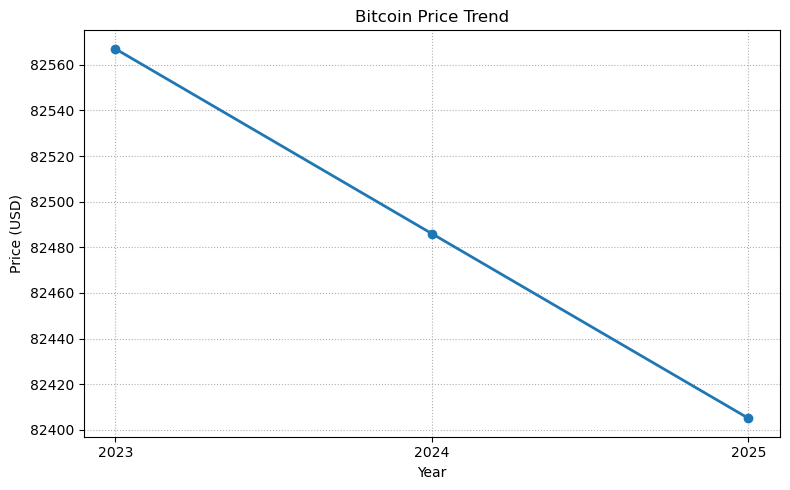

In [29]:
def plot_individual_trends(results_df, crypto_symbol):
    crypto = results_df[results_df['Symbol'] == crypto_symbol].iloc[0]
    
    plt.figure(figsize=(8, 5))
    plt.plot(['2023', '2024', '2025'], 
             [crypto['2023 Price'], crypto['2024 Price'], crypto['2025 Prediction']], 
             'o-', linewidth=2)
    
    plt.title(f"{crypto['Name']} Price Trend")
    plt.xlabel('Year')
    plt.ylabel('Price (USD)')
    plt.grid(True, linestyle=':')
    
    plt.tight_layout()
    plt.savefig(f'{crypto_symbol}_trend.png')
    plt.show()

if __name__ == "__main__":
    results = predict_2025_prices()
    plot_individual_trends(results, 'BTC') 
